# **Problem Statement**

Develop a machine learning model to predict insurance premium amount for a insurance company for a given set of applicants based on historical data. The dataset includes various features such as age,sex,BMI,classif (Health classification based on BMI index), children, smoker, region and charges. The goal is to create a reliable predictive model that can assist in automating the premium amount calculation process, helping insurance companies make decisions.

# **Aim & Objective**

Aim :
The aim of this project is to build an accurate and robust machine learning model that can predict the insurance policy amount.

Objective :

● Understand the data very well. Do all
transformations / data engineering / etc. wherever applicable.

● Perform Exploratory Data Analysis (EDA)

● Carry out all the Data mining tasks

● Identify the salient features that will determine the best results

● Perform the model evaluation to select the best algorithms

# **Importing required liabraries**

In [78]:
import numpy as np                                                                         # working with arrays
import pandas as pd                                                                        # loading the dataset
import matplotlib.pyplot as plt                                                            # visualization
import seaborn as sb                                                                       # visualization and correlation

from sklearn import preprocessing                                                          # data preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler                              # data scaling
from sklearn.model_selection import train_test_split,StratifiedKFold,KFold,LeaveOneOut     # data splitting

# model building liabraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

# **Step 1 : Data Collection**

In [79]:
# Reading CSV train data file into DataFrame

from google.colab import files
upload = files.upload()

Saving Insurance Premium Prediction.ipynb to Insurance Premium Prediction.ipynb


In [80]:
insurance_data = pd.read_csv("DS3_C6_S1_Regression_Insurance_Data_Project.csv")

In [81]:
# previewing the data

insurance_data.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


# **Step 2 : Data Exploration**

## **1) Finding the information about the dataset**

In [82]:
# shape of the dataset

print('Number of rows in data is {}.'.format(insurance_data.shape[0]))
print('Number of columns in data is {}.'.format(insurance_data.shape[1]))

Number of rows in data is 1338.
Number of columns in data is 8.


In [83]:
# Columns in the dataframe

insurance_data.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [84]:
# information about the dataset

insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [85]:
# exploring the existing data types

insurance_data.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [86]:
# exploring the numeric data types

insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.133782,14.958658,-58.0000,26.00000,39.000,51.000000,190.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [87]:
# exploring the strings

df_string=insurance_data.select_dtypes(exclude=[np.number])
df_string.head()

,sex,classif,smoker,region
0,female,PREO,yes,southwest
1,male,OB1,no,southeast
2,male,OB1,no,southeast
3,male,N,no,northwest
4,male,PREO,no,northwest


In [88]:
# checking missing values in data

insurance_data.isnull().sum()    # isnull returns the True/False dataframe
                                 #sum: counts the number of True in columns

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

**Interpretation: "classif" attribute in the dataset contains 8 missing values**

In [89]:
# Seprating out the categorical and continuous variables

def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 30:        # nunique:  returns unique values in the column,
                                             #here 30 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)

    return categorical, continuous


categorical, continuous = seprate_data_types(insurance_data)     # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  ------------
sex            age
classif        bmi
children       charges
smoker
region


**Interpretation : Data type of 'children' attribute is an int64 but as unique values in are less that 30, I am treating it as 'categorical variable' for all next steps**

In [90]:
# converting dtype of 'children' attribute

insurance_data['children']=insurance_data['children'].astype('category')

In [91]:
# exploring data types again
insurance_data.dtypes

age            int64
sex           object
bmi          float64
classif       object
children    category
smoker        object
region        object
charges      float64
dtype: object

## **2) Exploratory Data Analysis**

---

Exploratory Data Analysys(EDA) is conducted to gain valuable insights and patterns from the dataset. Through visualizations and statistical analysis we can identify correlations between features and target variable, detecting the outliers and explore relationship within the data.

### $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

In [92]:
"""User defined function for analysis of categorical columns
This function will check for the following :
Unique values
Mode
Total count of missing values"""

def info_of_cat(col):
    print(f"Unique values in {col} are: {insurance_data[col].unique()}")
    print(f"Mode of {col} is {insurance_data[col].mode()[0]}")
    print(f"Number of missing values in {col} is {insurance_data[col].isnull().sum()}")

In [93]:
for i in categorical:
    info_of_cat(i)
    print('-------------------------------------------------------')

Unique values in sex are: ['female' 'male']
Mode of sex is male
Number of missing values in sex is 0
-------------------------------------------------------
Unique values in classif are: ['PREO' 'OB1' 'N' 'OB2' 'OB3' nan 'UW']
Mode of classif is OB1
Number of missing values in classif is 8
-------------------------------------------------------
Unique values in children are: [0, 1, 3, 2, 5, 4]
Categories (6, int64): [0, 1, 2, 3, 4, 5]
Mode of children is 0
Number of missing values in children is 0
-------------------------------------------------------
Unique values in smoker are: ['yes' 'no']
Mode of smoker is no
Number of missing values in smoker is 0
-------------------------------------------------------
Unique values in region are: ['southwest' 'southeast' 'northwest' 'northeast']
Mode of region is southeast
Number of missing values in region is 0
-------------------------------------------------------


### **2.1) Analysis of sex**

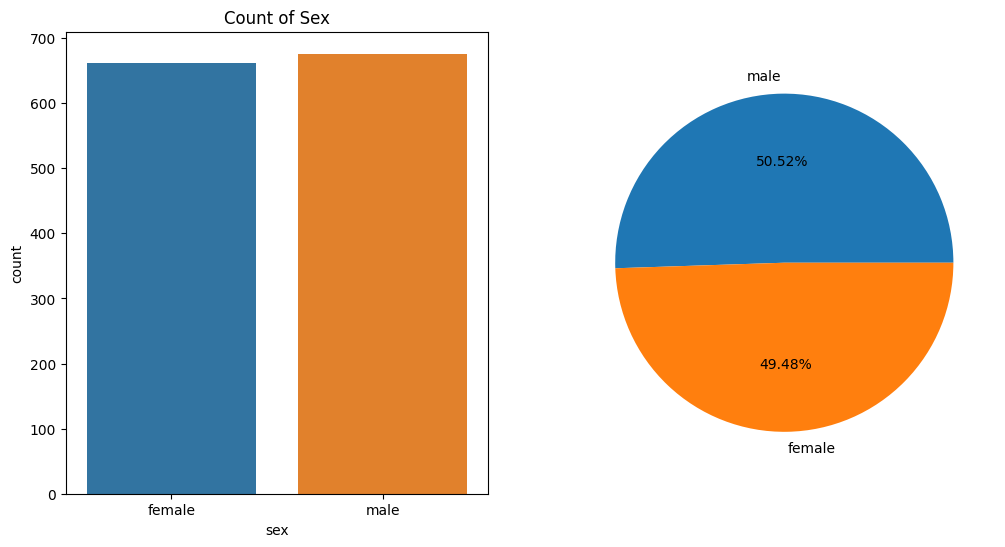

In [94]:
# Visual respresentation of sex attribute

fig, ax = plt.subplots(1, 2, figsize = (12, 6))              # setting canvas for the plot
ax[0].set_title("Count of Sex")                              # setting the title of the graph
percentage = insurance_data["sex"].value_counts()            # value_counts: returns the count of values in series: return series
labels = list(insurance_data["sex"].value_counts().index)    # converting the index of value counts into list

sb.countplot(x = insurance_data["sex"], ax = ax[0])          # plotting countplot
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")      # autopct: to print the percentage on pie wedge. 2 decimal points used

plt.show()


Interpretation: Sex is a nominal
datatype (Categorical).Female customer count and male customer count is approximately same

### **2.2) Analysis of classif**

In [95]:
info_of_cat("classif")     # Calling the function

Unique values in classif are: ['PREO' 'OB1' 'N' 'OB2' 'OB3' nan 'UW']
Mode of classif is OB1
Number of missing values in classif is 8


Interpretation: classif is a nominal datatype (Categorical). There are 8 null values in the classif. I need to perform missing value treatment during data preparation step.

**Missing value treatment**:  Mode of the classif

Note: Mode is not a perfect way to  way to fill the missing value in this case. One might need to handle such a situation with caution by consulting the domain expert. This is for demonstration purposes only.

In [96]:
# Missing value treatment

insurance_data["classif"].fillna(insurance_data["classif"].mode()[0],inplace=True)

In [97]:
# Checking again for null values

info_of_cat("classif")               # Calling the function

Unique values in classif are: ['PREO' 'OB1' 'N' 'OB2' 'OB3' 'UW']
Mode of classif is OB1
Number of missing values in classif is 0


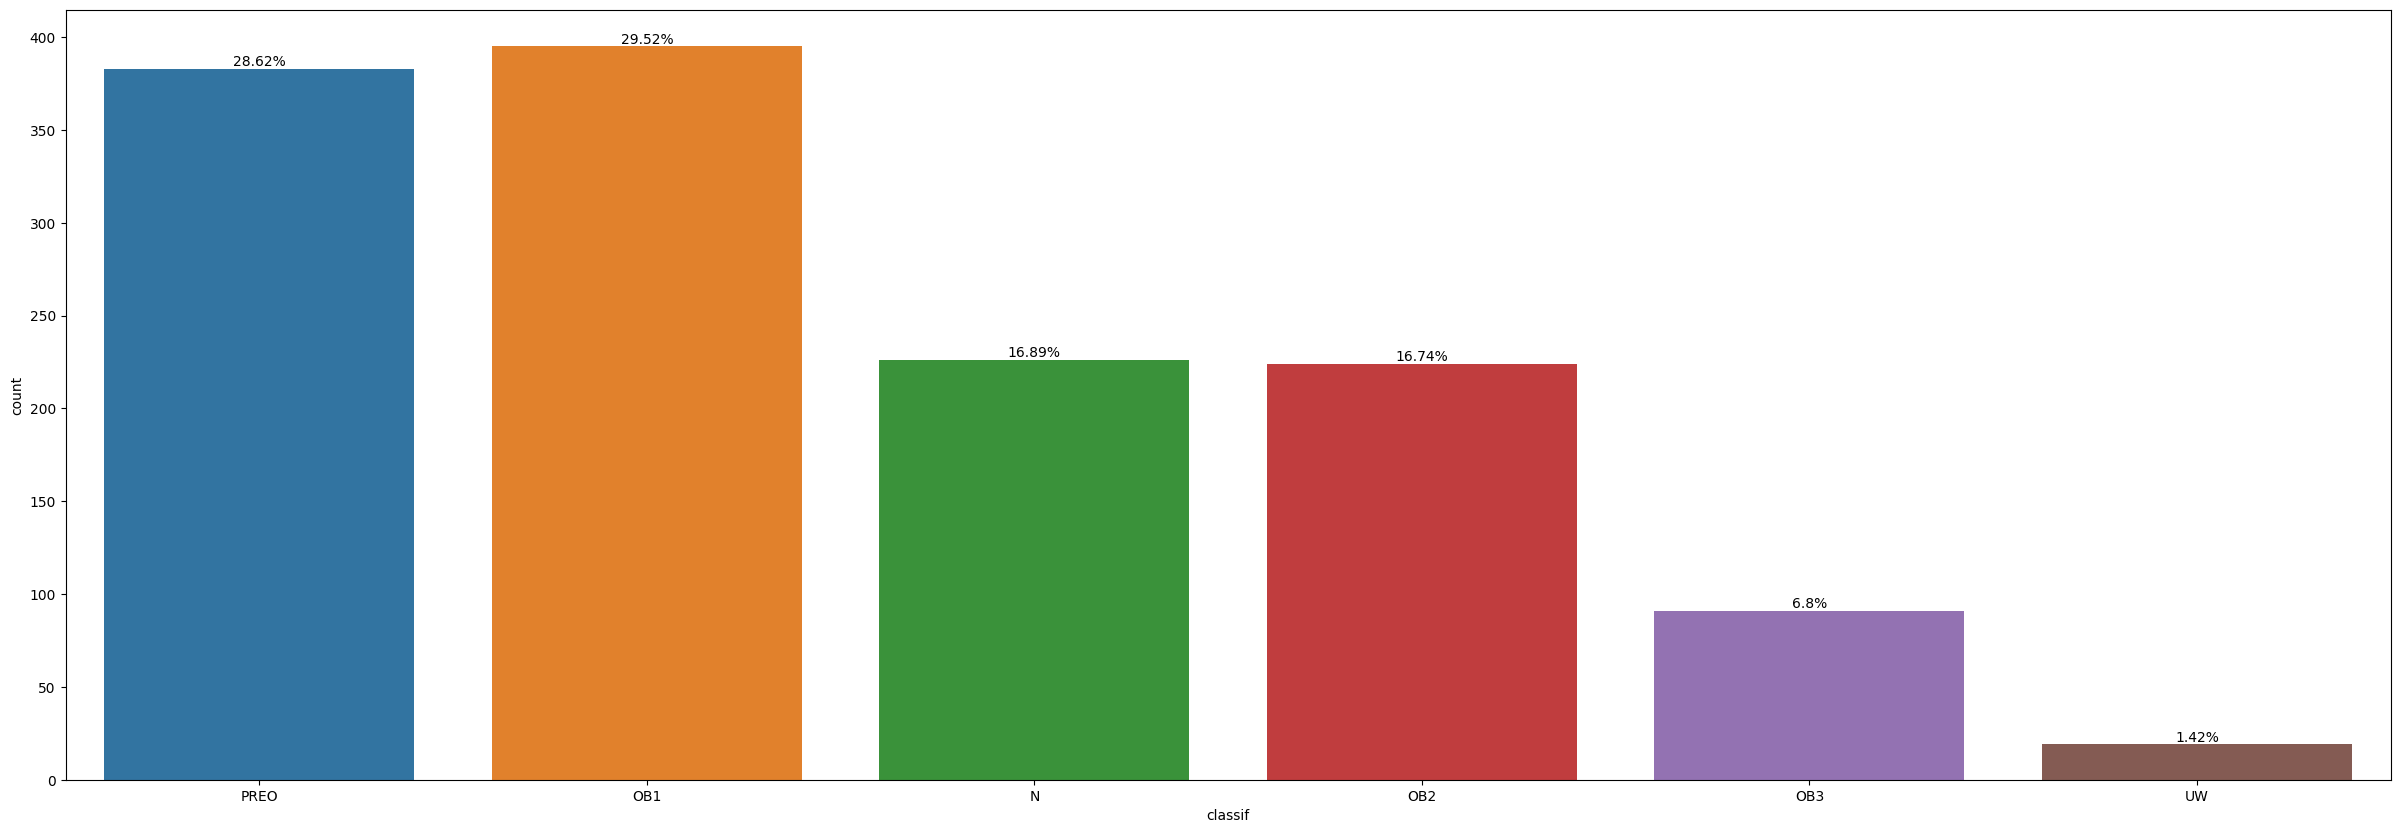

In [98]:
# Visual representation of classif attribute

fig, ax = plt.subplots(figsize= (12, 6))                           # setting canvas for plot
ax = sb.countplot(x = insurance_data["classif"])                    # countplot
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height()*100 /len(insurance_data), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage)
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head.
    fig.set_figheight(10)                                           # annotate: used to annotate over objects, here objects are the bars
    fig.set_figwidth(30)
plt.show()

Interpretation: Very few customers (1.42%) belongs to UW classification class. and majority of the customers (28.62%)  belong to PREO class

### **2.3) Analysis of Children**

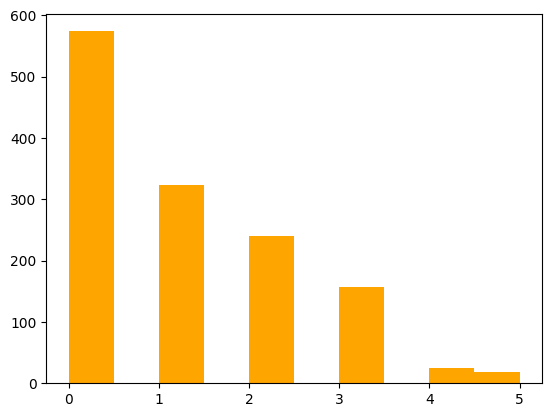

In [99]:
# Plotting histogram

plt.hist(insurance_data["children"],color='orange')
plt.show()

Interpretation: Majority of customers having no child and only few customers are having 5 number of children

### **2.4) Analysis of Smoker**

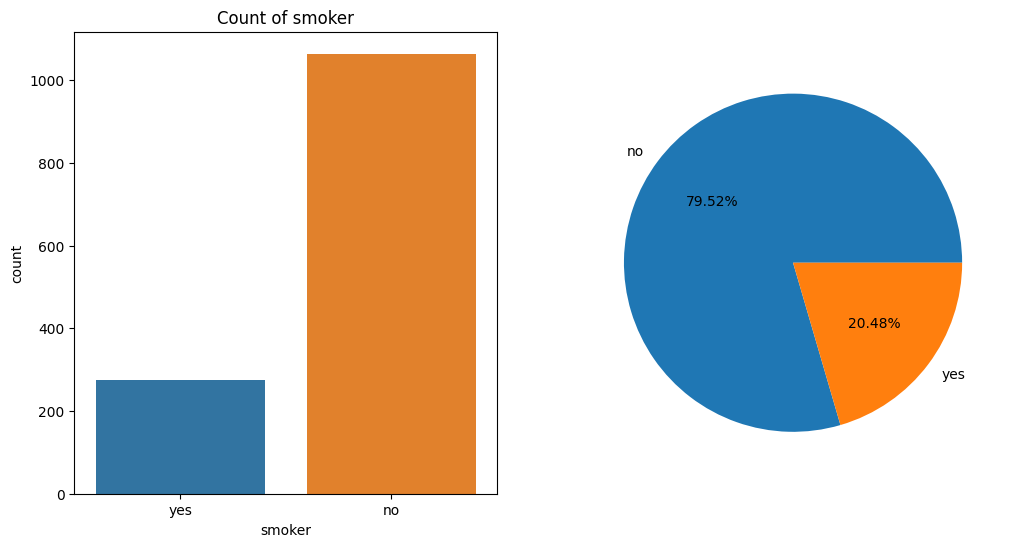

In [100]:
# Visual respresentation of smoker attribute

fig, ax = plt.subplots(1, 2, figsize = (12, 6))                 # setting canvas for the plot
ax[0].set_title("Count of smoker")                              # setting the title of the graph
percentage = insurance_data["smoker"].value_counts()            # value_counts: returns the count of values in series: return series
labels = list(insurance_data["smoker"].value_counts().index)    # converting the index of value counts into list

sb.countplot(x = insurance_data["smoker"], ax = ax[0])         # plotting countplot
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")        # autopct: to print the percentage on pie wedge. 2 decimal points used

plt.show()

Interpretation: 79.52% customers are non-smokers

### **2.5) Analysis of region**

[]

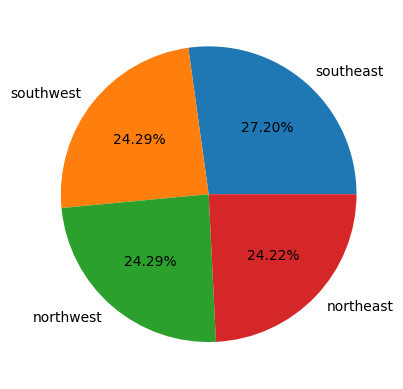

In [101]:
# Visual respresentation of region attribute

percentage = insurance_data["region"].value_counts()            # value_counts: returns the count of values in series: return series
labels = list(insurance_data["region"].value_counts().index)    # converting the index of value counts into list

plt.pie(percentage,labels = labels, autopct= "%0.2f%%")        # autopct: to print the percentage on pie wedge. 2 decimal points used
plt.plot()

Interpretation: 27.20% customers are from southeast region, then 24.29% are from southwest and nortwest. 24.22% customers are from northeast.

### $$\;\;\;\; Univariate \ Analysis \ of \ Numerical \ Variables$$

In [102]:
#User defined function for calculating mean, median, mode, standard deviation, and count of all null values of numerical columns

def info_of_numerical(col):
    print(f"The mean of the {col} is {round(insurance_data[col].mean(),2)}")
    print(f"The median of the {col} is {insurance_data[col].median()}")
    print(f"The mode of the {col} is {insurance_data[col].mode()[0]}")
    print(f"The max of the {col} is {insurance_data[col].max()}")
    print(f"The min of the {col} is {insurance_data[col].min()}")
    print(f"The standard deviation of the {col} is {round(insurance_data[col].std(),2)}")
    print(f"Number of missing values in the {col} is {insurance_data[col].isnull().sum()}")

In [103]:
# Analysis of numerical datatypes

for i in continuous:
    info_of_numerical(i)
    print('-------------------------------------------------------')

The mean of the age is 39.13
The median of the age is 39.0
The mode of the age is 18
The max of the age is 190
The min of the age is -58
The standard deviation of the age is 14.96
Number of missing values in the age is 0
-------------------------------------------------------
The mean of the bmi is 30.66
The median of the bmi is 30.4
The mode of the bmi is 32.3
The max of the bmi is 53.13
The min of the bmi is 15.96
The standard deviation of the bmi is 6.1
Number of missing values in the bmi is 0
-------------------------------------------------------
The mean of the charges is 13270.42
The median of the charges is 9382.033
The mode of the charges is 1639.5631
The max of the charges is 63770.42801
The min of the charges is 1121.8739
The standard deviation of the charges is 12110.01
Number of missing values in the charges is 0
-------------------------------------------------------


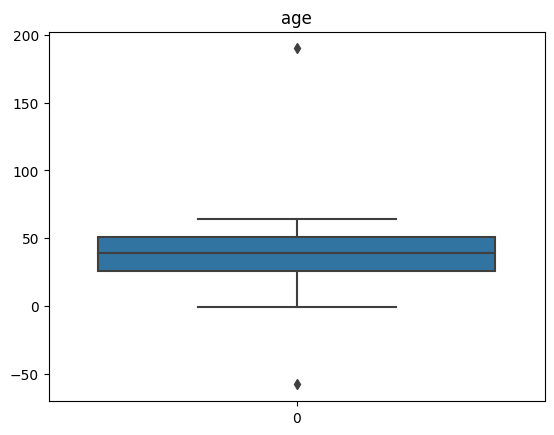

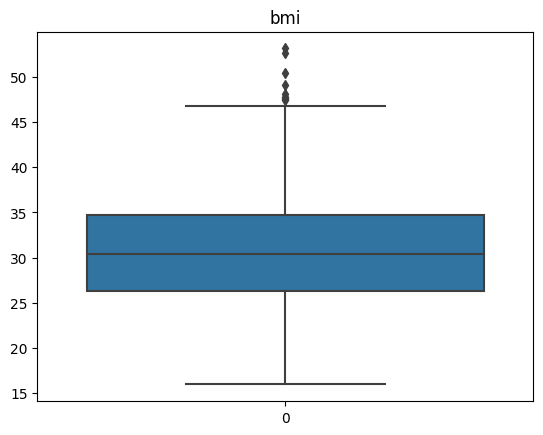

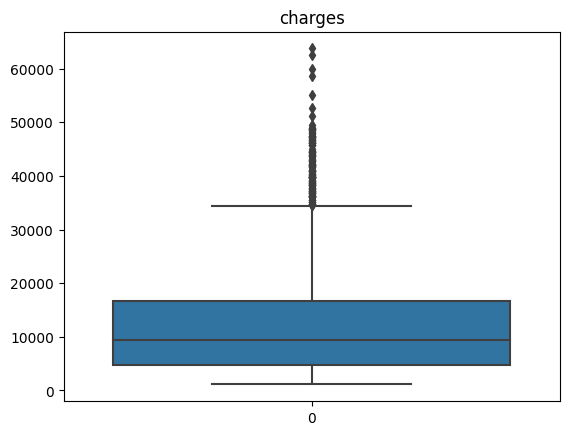

In [104]:
# Finding outliers using boxplot

def boxplots(col):
    sb.boxplot(insurance_data[col])
    plt.title(col)
    plt.show()

for i in list(continuous):
     boxplots(i)

Interpretation: Observing that age and bmi attribute has less outliers and charges has significant of outliers. I will check proportion of outliers in target variable.

In [105]:
# checking outliers in target variable

Q3 = np.percentile(insurance_data['charges'],75)
Q1 = np.percentile(insurance_data['charges'],25)
IQR = Q3-Q1
Max_Val = Q3 + (1.5*IQR)
Min_Val = Q1 - (1.5*IQR)
outliers = []

for i in insurance_data['charges']:
  if (i<Min_Val) or (i>Max_Val):
    outliers.append(i)

print(f"Number of outliers in the target variable {len(outliers)}.")

Number of outliers in the target variable 139.


Interpretation :

1.    There are 139 outliers out of 1338. That means outliers constitute 10% of the data.

2.    For 'age' and 'bmi' we can simply remove outliers or replace it with mean.

3.    But in case of target variable ('charges') there are more outliers and also from graph it is seen that data is not normally distributed and outliers not to random. So we can consider replacing them with median. because median is generally used as a measure of central tendency when there are outliers in the data, or when the data is not normally distributed. This is because the median is not affected by outliers, while the mean is.

4.    So, if there are lot of outliers in output variable, we may  consider replacing them with the median. However, it is important to note that this can also lead to biased results, especially if the outliers are not random.

5.   Another option is to use a robust regression algorithm.Robust regression algorithms are less sensitive to outliers than traditional regression algorithms, and they can produce more accurate results when the data is not normally distributed.

6.    We can also try using a MinMaxScaler to normalize the data. This can help to reduce the impact of outliers on the regression model



### **2.6) Analysis of continuous variable using histogram**

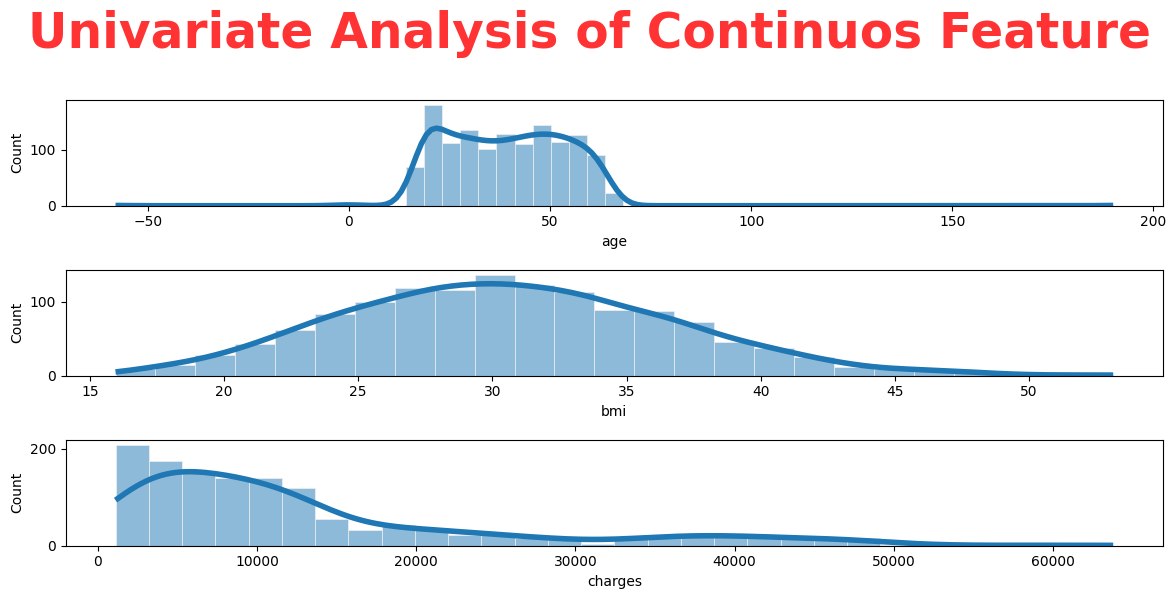

In [106]:
#histplot of continuous variable

continuous1=['age','bmi','charges']

fig,axs=plt.subplots(nrows=3,ncols=1,figsize=(12, 6))
plt.suptitle('Univariate Analysis of Continuos Feature',fontsize=35,fontweight='bold',alpha=0.8,y=1,color='red')
plt.style.use('fivethirtyeight')
plt.rcParams.update({'text.color':'black'})
axs=axs.flatten()

for i,var in enumerate(continuous1):
    sb.histplot(x=var,data=insurance_data,ax=axs[i],kde=True)

fig.tight_layout()

Interpretation : It is observed that target variable is not normally distributed and it is right skewed data.

### **2.7) Analysis of continuous variable using violinplot**

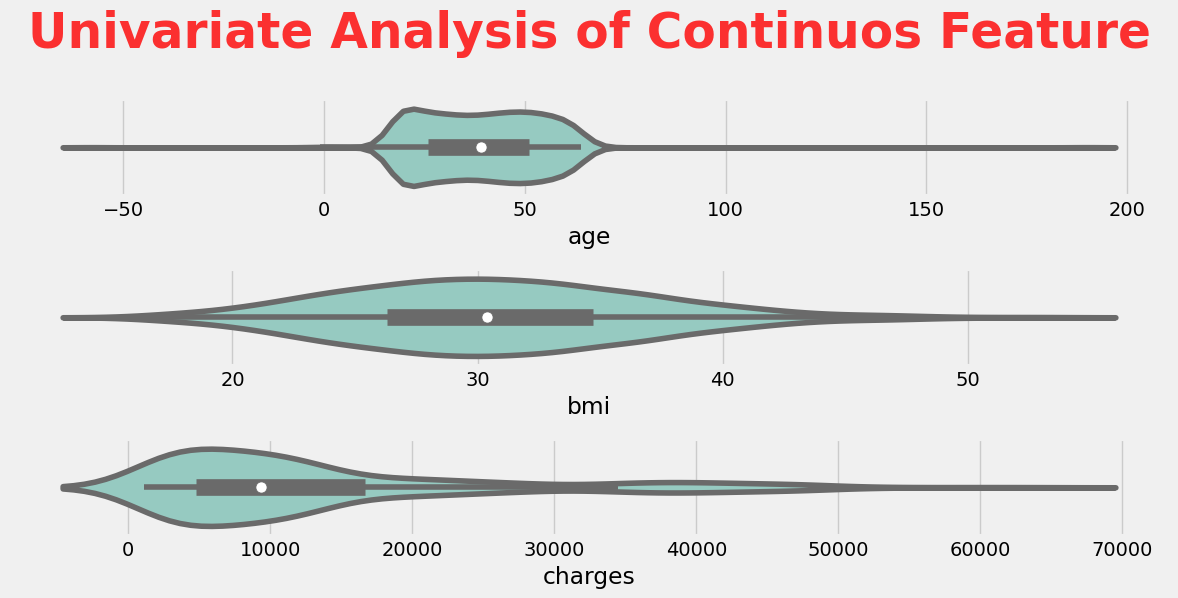

In [107]:
#violinplot of continuous variable


continuous1=['age','bmi','charges']

fig,axs=plt.subplots(nrows=3,ncols=1,figsize=(12, 6))
plt.suptitle('Univariate Analysis of Continuos Feature',fontsize=35,fontweight='bold',alpha=0.8,y=1,color='red')
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
axs=axs.flatten()

for i,var in enumerate(continuous1):
    sb.violinplot(x=var,data=insurance_data,ax=axs[i])

fig.tight_layout()

### **2.8) Analysis of Charges¶**

[]

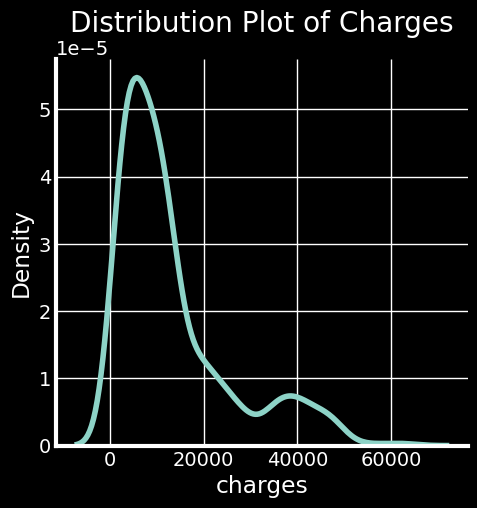

In [108]:
# Plotting KDE plot of charges

sb.displot(data = insurance_data, x = 'charges', kind = 'kde' )
plt.title("Distribution Plot of Charges")                #Setting title of the plot
plt.plot()

Interpretation: It is observed that target variable has a very large range of values and it is skewed. So during Data Scaling step we will do Data Scaling on both X(Features) and Y(Labels) using MinMax Scalar. This will help to improve the numerical stability of the training process and also to improve the performance of some regression algorithms.

### $$\;\;\;\; Bivariate \ Analysis$$

### **2.9) Analysis of agewise insurance charges**

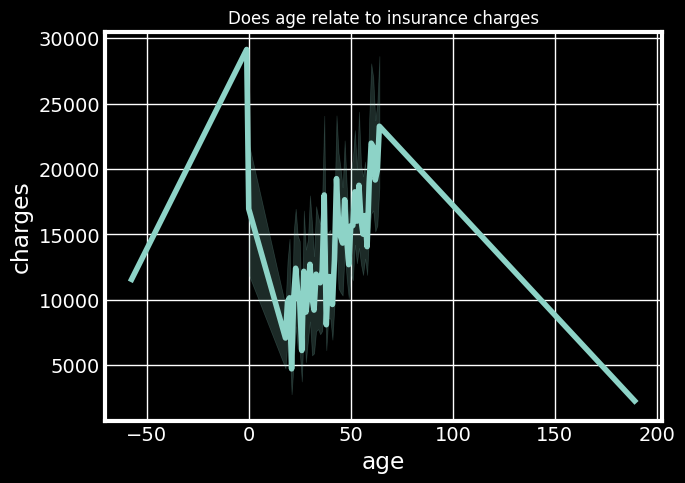

In [109]:
# plotting lineplot

sb.lineplot(y = insurance_data['charges'], x = insurance_data['age'])
plt.style.use('default')
plt.title('Does age relate to insurance charges')                               # setting title of the plot
plt.show()

Interpretation: insurace charges increases with customer age (Neglecting extreme data points)

### **2.10) Analysis of genderwise insurance charges**

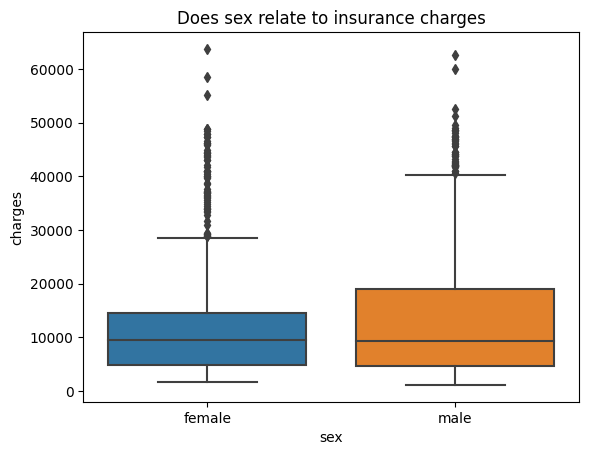

In [110]:
# plotting boxplot

sb.boxplot(y = insurance_data['charges'], x = insurance_data['sex'])
plt.style.use('default')
plt.title('Does sex relate to insurance charges')                      #setting title of the graph
plt.show()

Interpretation: It is observed that average insurance amount for male and female is same

## 2.11) Analysis of bmi vs charges

Text(0.0, 1.0, 'Does bmi relate to insurance charges')

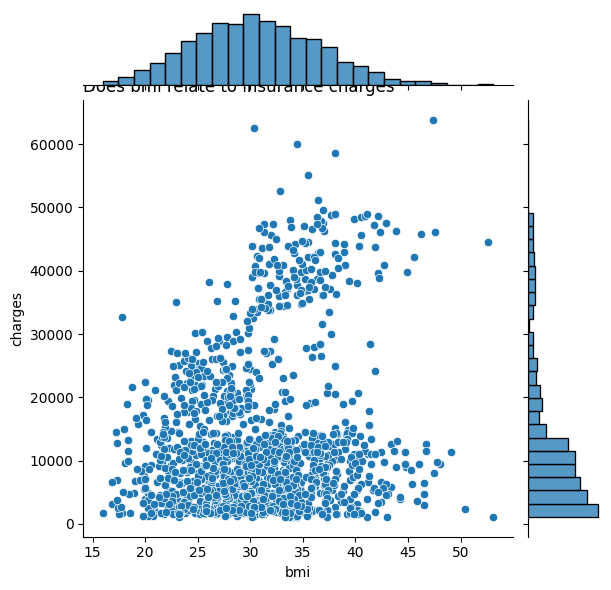

In [111]:
# Plotting jointplot

sb.jointplot(data =insurance_data , x = 'bmi', y = 'charges')
plt.title("Does bmi relate to insurance charges",loc='left')        # setting title of the graph and fixing its location

Text(0.0, 1.0, 'Does bmi relate to insurance charges')

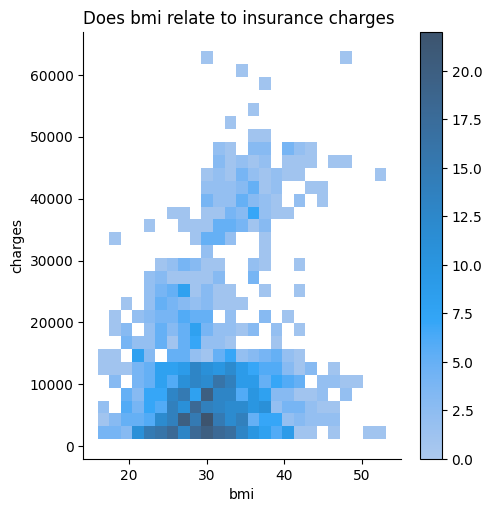

In [112]:
# Plotting displot

sb.displot(data = insurance_data, x = 'bmi', y= 'charges', cbar = True)
plt.title("Does bmi relate to insurance charges",loc='left')        # setting title of the graph and fixing its location

Interpretation: It is observed no linear relationship of bmi with insurance charges

### **2.12) Analysis of classif vs charges**

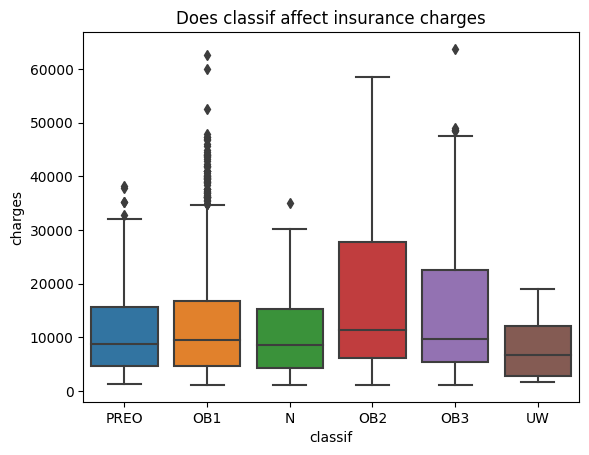

In [113]:
# plotting boxplot

sb.boxplot(y = insurance_data["charges"], x = insurance_data["classif"])
plt.title("Does classif affect insurance charges")                      #setting title of the graph
plt.show()

Interpretation: It is seen that average insurance charges is higher for OB2

### **2.13) Analysis of children vs charges**

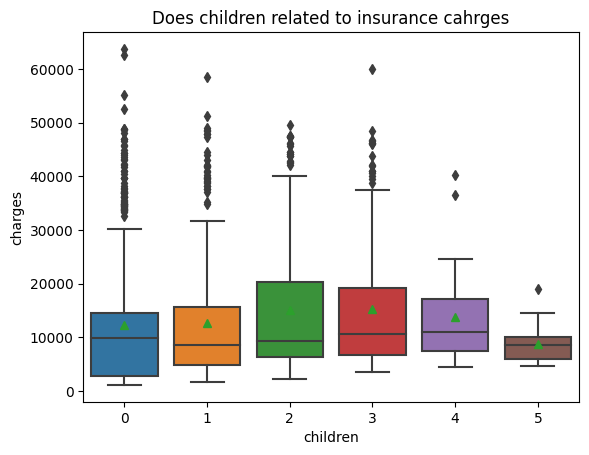

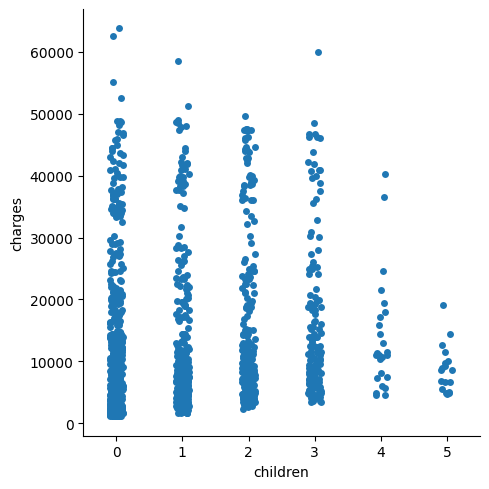

In [114]:
# children vs charges

plt.title("Does children related to insurance cahrges")                                              #setting title of the graph
sb.boxplot(y = insurance_data['charges'], x = insurance_data['children'],showmeans=True)             #plotting boxplot
sb.catplot(data = insurance_data, x= 'children', y= 'charges', kind = 'strip')                       #plotting catplot

Interpretation: It is seen that mean insurance charges for the customers having 4 children is higher than others from boxplot. From catplot we can say there are more customers having no child.

## **2.14) Analysis of smoker vs charges**

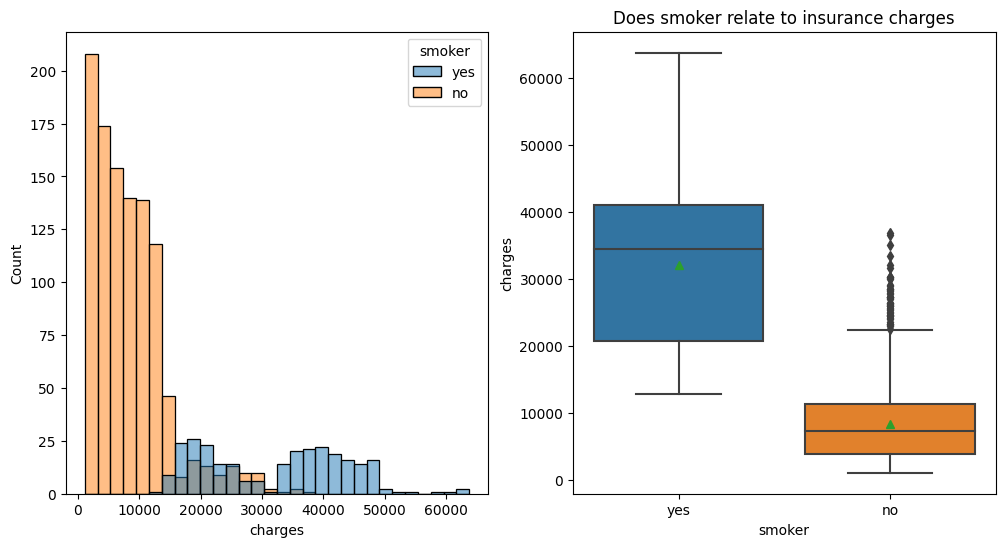

In [115]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))                                        #setting canvas of the graph
sb.histplot(x = insurance_data['charges'], hue = insurance_data['smoker'], ax = ax[0]) #plotting histplot
sb.boxplot(y = insurance_data['charges'], x = insurance_data['smoker'], ax = ax[1],showmeans=True)    #plotting boxplot
plt.title("Does smoker relate to insurance charges")                                   #setting title of the graph
plt.show()

Interpretation: It is observed that for customers who smoke, insurance charges are higher than customers who do not smoke

### **2.13) Analysis of region vs charges**

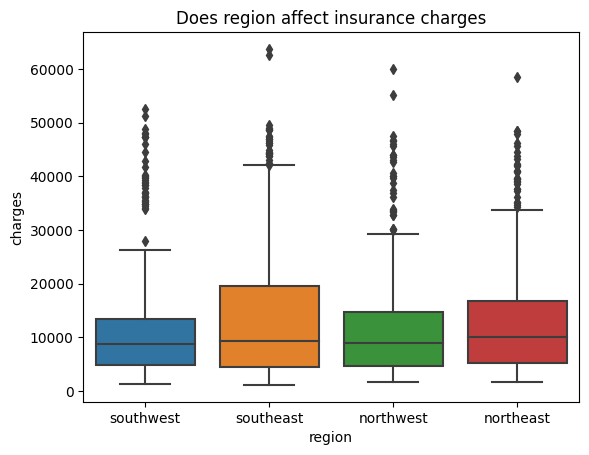

In [116]:
# plotting boxplot

sb.boxplot(y = insurance_data["charges"], x = insurance_data["region"])
plt.title("Does region affect insurance charges")                      #setting title of the graph
plt.show()

Interpretation: It is seen that average insurance charges is nearly same for all region

# **Step 3 : Data Preparation**

## **3.1) Missing Value Treatment¶**

In [117]:
# Checking for null value in each column

print(insurance_data.isnull().sum())

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64


Interpretation: There are 8 missing values in classif feature. As it is catergorical variable, we will replace it with mode

In [118]:
# Replacing missing values with mode

insurance_data['classif'].fillna(insurance_data['classif'].mode()[0],inplace=True)

In [119]:
# Again checking for missing values

insurance_data['classif'].mode()[0]
print(insurance_data.isnull().sum())

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64


Interpretation: Now there are no any missing values in the dataset

## **3.2) Feature Engineering**

Label Encoding can be done using in-built LabelEncoder() function or using one hot encoding method. We will see both the ways of lable encoding.

### **3.2.1) Label Encoding using LabelEncoder() inbuilt function**

In [120]:
# Converting numeric labeled column into categorical column

insurance_data['children']=insurance_data['children'].astype('category')
print(insurance_data.head())
print(insurance_data.dtypes)

   age     sex     bmi classif children smoker     region      charges
0   19  female  27.900    PREO        0    yes  southwest  16884.92400
1   18    male  33.770     OB1        1     no  southeast   1725.55230
2   28    male  33.000     OB1        3     no  southeast   4449.46200
3    0    male  22.705       N        0     no  northwest  21984.47061
4   32    male  28.880    PREO        0     no  northwest   3866.85520
age            int64
sex           object
bmi          float64
classif       object
children    category
smoker        object
region        object
charges      float64
dtype: object


In [121]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encoding labels in column 'sex'.
insurance_data['sex']= label_encoder.fit_transform(insurance_data['sex'])
insurance_data['sex'].unique()

array([0, 1])

In [122]:
# Encoding labels in column 'classif'.
insurance_data['classif']= label_encoder.fit_transform(insurance_data['classif'])
insurance_data['classif'].unique()

array([4, 1, 0, 2, 3, 5])

In [123]:
# Encoding labels in column 'smoker'.
insurance_data['smoker']= label_encoder.fit_transform(insurance_data['smoker'])
insurance_data['smoker'].unique()

array([1, 0])

In [124]:
# Encoding labels in column 'smoker'.
insurance_data['region']= label_encoder.fit_transform(insurance_data['region'])
insurance_data['region'].unique()

array([3, 2, 1, 0])

In [125]:
# Previewing the data
insurance_data.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,0,27.900,4,0,1,3,16884.92400
1,18,1,33.770,1,1,0,2,1725.55230
2,28,1,33.000,1,3,0,2,4449.46200
3,0,1,22.705,0,0,0,1,21984.47061
4,32,1,28.880,4,0,0,1,3866.85520


nterpretation: All categorical columns are converted into numeric columns. This can be done using for loop as follows

In [126]:
# Label encoding using loop

print(categorical)

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

for i in categorical:
    insurance_data[i] = label_encoder.fit_transform(insurance_data[i])
    print(f"Unique values in {i} are {insurance_data[i].unique()}")

print(insurance_data.head())

['sex', 'classif', 'children', 'smoker', 'region']
Unique values in sex are [0 1]
Unique values in classif are [4 1 0 2 3 5]
Unique values in children are [0 1 3 2 5 4]
Unique values in smoker are [1 0]
Unique values in region are [3 2 1 0]
   age  sex     bmi  classif  children  smoker  region      charges
0   19    0  27.900        4         0       1       3  16884.92400
1   18    1  33.770        1         1       0       2   1725.55230
2   28    1  33.000        1         3       0       2   4449.46200
3    0    1  22.705        0         0       0       1  21984.47061
4   32    1  28.880        4         0       0       1   3866.85520


### **3.2.2) Label Encoding using One Hot Encoding Method**

In [127]:
 # Encoding all the categorical features
cat_attr_list = categorical

numeric_feature_cols = continuous

print("cat_attr_list\n",cat_attr_list)
print("numeric_feature_cols\n",numeric_feature_cols)

cat_attr_list
 ['sex', 'classif', 'children', 'smoker', 'region']
numeric_feature_cols
 ['age', 'bmi', 'charges']


In [128]:
#Encoding sex
sex_dummies = pd.get_dummies(insurance_data.sex, prefix="sex")
df_with_dummies = pd.concat([insurance_data,sex_dummies],axis='columns')
df_with_dummies.drop('sex',axis='columns',inplace=True)

#Encoding classif
classif_dummies = pd.get_dummies(insurance_data.classif, prefix="classif")
df_with_dummies = pd.concat([df_with_dummies,classif_dummies],axis='columns')
df_with_dummies.drop('classif',axis='columns',inplace=True)

#Encoding children
children_dummies = pd.get_dummies(insurance_data.children, prefix="children")
df_with_dummies = pd.concat([df_with_dummies,children_dummies],axis='columns')
df_with_dummies.drop('children',axis='columns',inplace=True)

#Encoding smoker
smoker_dummies = pd.get_dummies(insurance_data.smoker, prefix="smoker")
df_with_dummies = pd.concat([df_with_dummies,smoker_dummies],axis='columns')
df_with_dummies.drop('smoker',axis='columns',inplace=True)

#Encoding region
region_dummies = pd.get_dummies(insurance_data.region, prefix="region")
df_with_dummies = pd.concat([df_with_dummies,region_dummies],axis='columns')
df_with_dummies.drop('region',axis='columns',inplace=True)

In [129]:
# Previwing the data

df_with_dummies.head()

,age,bmi,charges,sex_0,sex_1,classif_0,classif_1,classif_2,classif_3,classif_4,...,children_2,children_3,children_4,children_5,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,16884.92400,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,18,33.770,1725.55230,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,28,33.000,4449.46200,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0,22.705,21984.47061,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,32,28.880,3866.85520,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


One hot encoding and label encoding are two common techniques for encoding categorical variables in machine learning. One hot encoding is more robust and less likely to introduce bias into models, but it can be less efficient for variables with a large number of categories. Label encoding is simpler and more efficient, but it can introduce bias if the order of the categories is meaningful. We will continue with label_encoding technique.

## **3.3) Feature Scaling**

In [130]:
scalar = MinMaxScaler()   # creating object
insurance_data_scale = scalar.fit_transform(insurance_data)
insurance_data_scale  = pd.DataFrame(insurance_data_scale  ,columns = insurance_data.columns)
insurance_data_scale .head()          #previewing the data

,age,sex,bmi,classif,children,smoker,region,charges
0,0.310484,0.0,0.321227,0.8,0.0,1.0,1.000000,0.251611
1,0.306452,1.0,0.479150,0.2,0.2,0.0,0.666667,0.009636
2,0.346774,1.0,0.458434,0.2,0.6,0.0,0.666667,0.053115
3,0.233871,1.0,0.181464,0.0,0.0,0.0,0.333333,0.333010
4,0.362903,1.0,0.347592,0.8,0.0,0.0,0.333333,0.043816


### **3.4) Feature Selection**

In [131]:
# Finding correlation among numerical features, based on their strong relation we can choose the importatnt features

corr=insurance_data_scale.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,classif,children,smoker,region,charges
age,1.000000,-0.035333,0.090474,-0.000393,0.044340,-0.028692,0.001660,0.268953
sex,-0.035333,1.000000,0.046371,-0.007723,0.017163,0.076185,0.004588,0.057292
bmi,0.090474,0.046371,1.000000,0.084317,0.012759,0.003750,0.157566,0.198341
classif,-0.000393,-0.007723,0.084317,1.000000,-0.027492,-0.009410,0.014004,-0.036921
children,0.044340,0.017163,0.012759,-0.027492,1.000000,0.007673,0.016569,0.067998
smoker,-0.028692,0.076185,0.003750,-0.009410,0.007673,1.000000,-0.002181,0.787251
region,0.001660,0.004588,0.157566,0.014004,0.016569,-0.002181,1.000000,-0.006208
charges,0.268953,0.057292,0.198341,-0.036921,0.067998,0.787251,-0.006208,1.000000


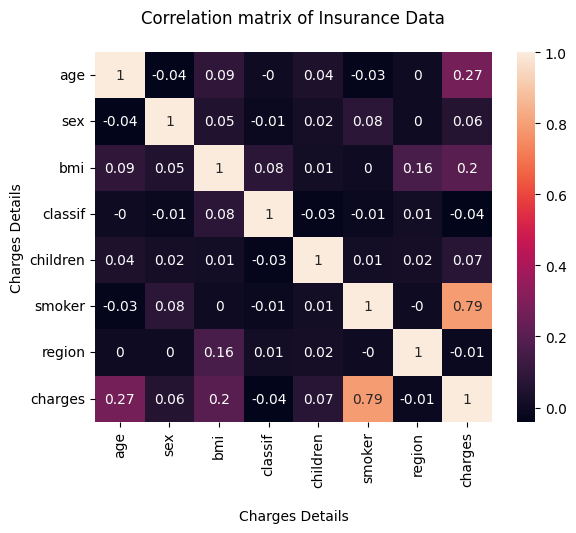

In [132]:
# Finding correlation among numerical features, using heatmap

hm = sb.heatmap(round(insurance_data_scale.corr(),2), annot = True)
hm.set(xlabel='\nCharges Details', ylabel='Charges Details', title = "Correlation matrix of Insurance Data\n")
plt.show()

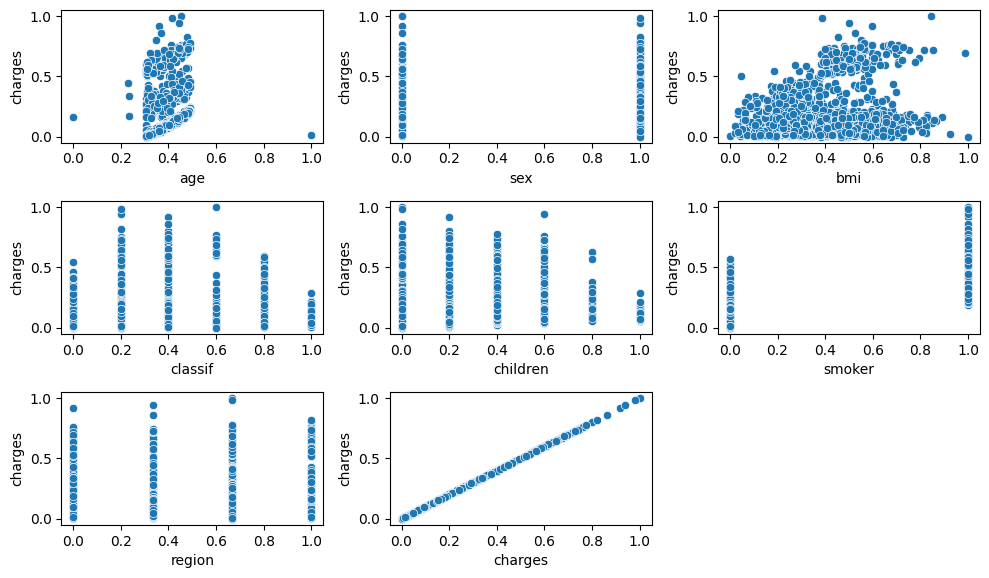

In [133]:
# Relationships between Features
# Scatter plot

fig = plt.figure(figsize=(10,15))             # setting canvas for plot
col = insurance_data_scale.columns
for i in range(len(col)):
 plt.subplot(8,3,i+1)
 sb.scatterplot(x= insurance_data_scale[col[i]],y = insurance_data_scale["charges"])
 plt.tight_layout()

In [134]:
# Correlation between features
# Finding correlation with significance for population

import scipy

chosen_features = []
for i in insurance_data_scale.columns:
 r, p = scipy.stats.pearsonr(insurance_data_scale[i], insurance_data_scale["charges"])
 print(f"Feature : {i}, corr = {r}, significant : {p<0.05}")
 if p < 0.05 :
     chosen_features.append(i)

Feature : age, corr = 0.26895299826210173, significant : True
Feature : sex, corr = 0.05729206220202535, significant : True
Feature : bmi, corr = 0.19834096883362887, significant : True
Feature : classif, corr = -0.03692148750878138, significant : False
Feature : children, corr = 0.0679982268479048, significant : True
Feature : smoker, corr = 0.7872514304984773, significant : True
Feature : region, corr = -0.006208234909444446, significant : False
Feature : charges, corr = 0.9999999999999999, significant : True


Pearson Correlation Coefficient measures the strength between the different variables and their relationships. It is observed that, 'classif' and 'region' attribute has very less correlationship with target variable. I am not removing these features, as we have limited features.

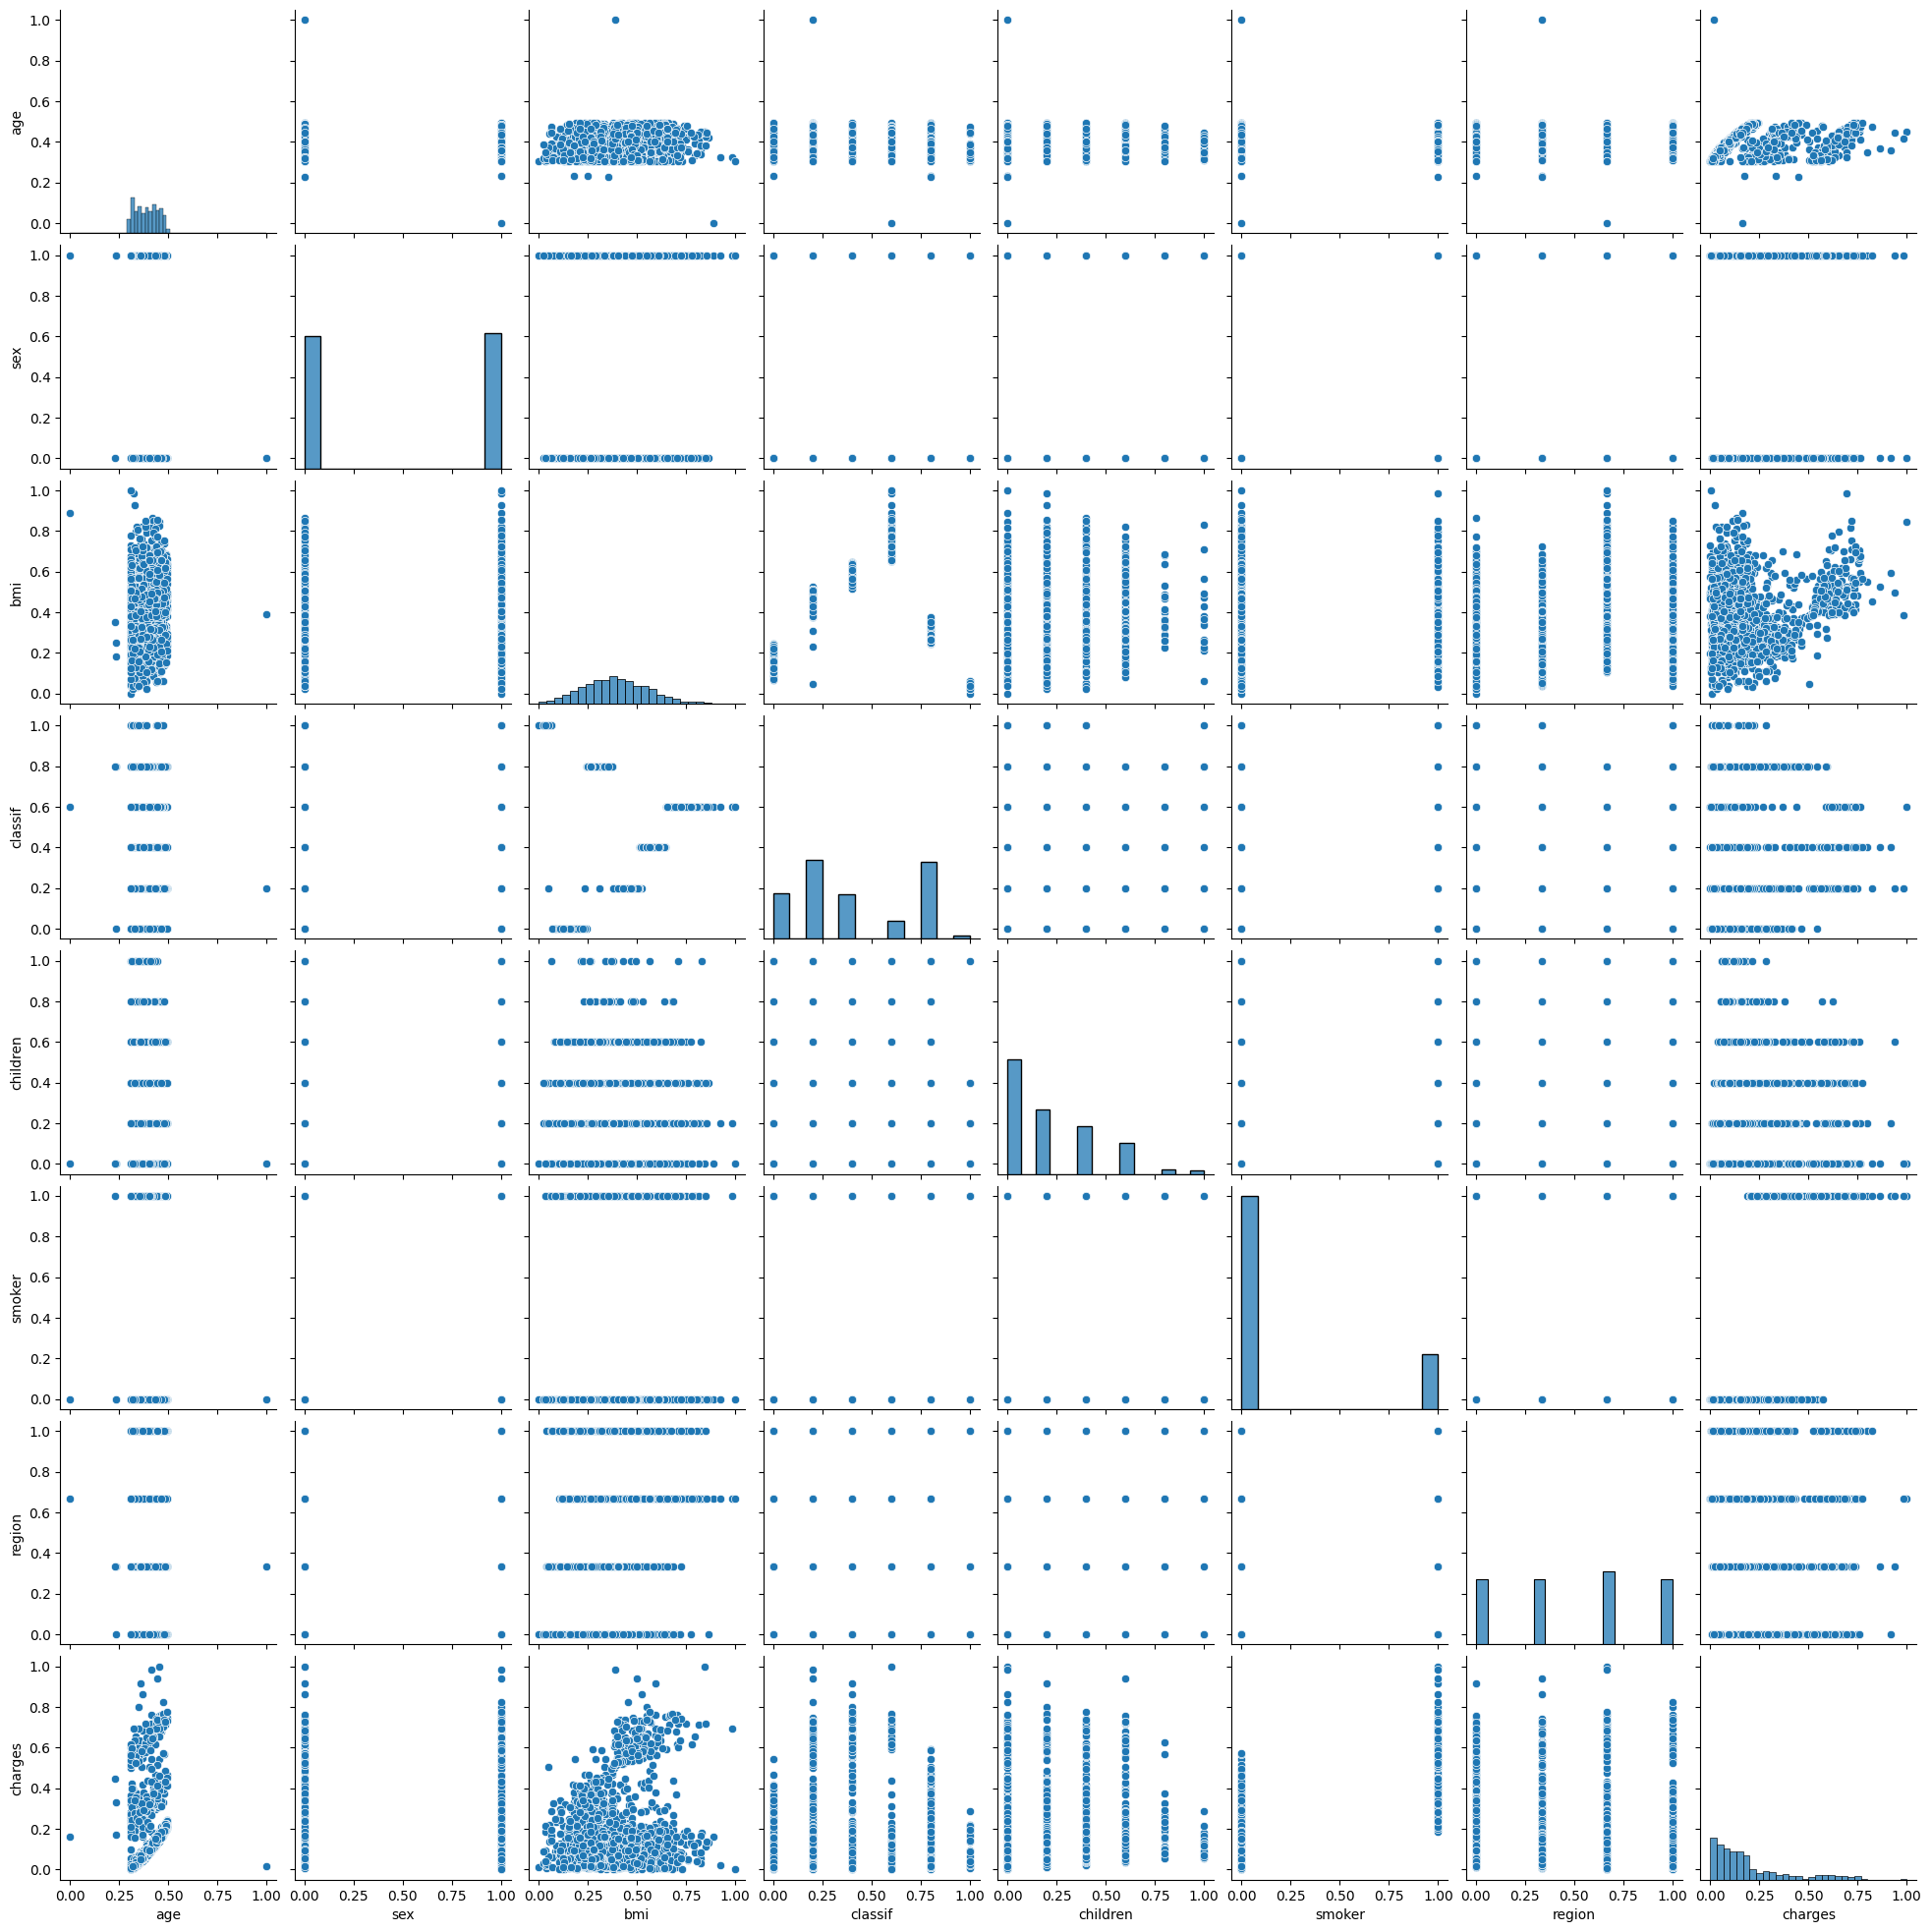

In [135]:
## Pairplot to find relationships between variables

sb.pairplot(insurance_data_scale)

Interpretation: It is observed no any strong or week correlation of any feature with target variable so we will not remove any feature.

## **3.5) Data Splitting**

There are different methods of Data Splitting in Machine Learning

1) Random train-test split

2) Stratified train-test split

3) K-fold cross-validation

4) Leave-one-out cross-validation

5) Time series split

We will see how to split the using all these techniques.But the best method of data splitting to use depends on the specific characteristics of dataset and machine learning model. In general, it is recommended to use a cross-validation method, such as k-fold cross-validation or leave-one-out cross-validation, to evaluate the performance of model. This will help to avoid overfitting and get a more realistic estimate of the model's performance on unseen data.

In [136]:
# Defining input/output

X = insurance_data_scale.drop(columns = 'charges')         # Features/Atrributes/Input Variable
y = insurance_data_scale['charges']                        # Label/ Output Variable

### **3.5.1) Random train-test split**

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)   # Splitting data into train and test dataset into 70:30 ratio
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))              # Checking shape of training and test data

Shape of new dataframes - (936, 7) , (402, 7)


### **3.5.2) K-fold cross-validation**

In [138]:
kf = KFold(n_splits=3, shuffle=False, random_state=None)               # specifying object
for train, test in kf.split(X):
    print("Train data\n",train,"\n","Test data\n",test)

Train data
 [ 446  447  448  449  450  451  452  453  454  455  456  457  458  459
  460  461  462  463  464  465  466  467  468  469  470  471  472  473
  474  475  476  477  478  479  480  481  482  483  484  485  486  487
  488  489  490  491  492  493  494  495  496  497  498  499  500  501
  502  503  504  505  506  507  508  509  510  511  512  513  514  515
  516  517  518  519  520  521  522  523  524  525  526  527  528  529
  530  531  532  533  534  535  536  537  538  539  540  541  542  543
  544  545  546  547  548  549  550  551  552  553  554  555  556  557
  558  559  560  561  562  563  564  565  566  567  568  569  570  571
  572  573  574  575  576  577  578  579  580  581  582  583  584  585
  586  587  588  589  590  591  592  593  594  595  596  597  598  599
  600  601  602  603  604  605  606  607  608  609  610  611  612  613
  614  615  616  617  618  619  620  621  622  623  624  625  626  627
  628  629  630  631  632  633  634  635  636  637  638  639  640

Interpretation : It returns index value of each split

### **3.5.3) Leave-one-out cross-validation**

In [139]:
LOO = LeaveOneOut()                                               # specifying object
for train, test in LOO.split(X):
    print("%s %s"% (train,test))

[   1    2    3 ... 1335 1336 1337] [0]
[   0    2    3 ... 1335 1336 1337] [1]
[   0    1    3 ... 1335 1336 1337] [2]
[   0    1    2 ... 1335 1336 1337] [3]
[   0    1    2 ... 1335 1336 1337] [4]
[   0    1    2 ... 1335 1336 1337] [5]
[   0    1    2 ... 1335 1336 1337] [6]
[   0    1    2 ... 1335 1336 1337] [7]
[   0    1    2 ... 1335 1336 1337] [8]
[   0    1    2 ... 1335 1336 1337] [9]
[   0    1    2 ... 1335 1336 1337] [10]
[   0    1    2 ... 1335 1336 1337] [11]
[   0    1    2 ... 1335 1336 1337] [12]
[   0    1    2 ... 1335 1336 1337] [13]
[   0    1    2 ... 1335 1336 1337] [14]
[   0    1    2 ... 1335 1336 1337] [15]
[   0    1    2 ... 1335 1336 1337] [16]
[   0    1    2 ... 1335 1336 1337] [17]
[   0    1    2 ... 1335 1336 1337] [18]
[   0    1    2 ... 1335 1336 1337] [19]
[   0    1    2 ... 1335 1336 1337] [20]
[   0    1    2 ... 1335 1336 1337] [21]
[   0    1    2 ... 1335 1336 1337] [22]
[   0    1    2 ... 1335 1336 1337] [23]
[   0    1    2 ... 1335 1

Interpretation : It returns index value of each split

### **3.5.4) Time series split**


---

This method is used for time series data, where the order of the samples is important. The dataset is split into training and test sets based on time, with the training set containing older data and the test set containing newer data



# **Step 4 : Model Building**


---

There are many different machine learning models for regression, but some of the most popular ones include :


1) Linear regression

2) Ridge regression

3) Lasso regression

4) Decision tree regression

5) Random forest regression

6) ADA Boosting

7) Key Nearest Neighbour

8) SVR


We will experiment with different machine learning models to find the one that works best for our data and we will also use a cross-validation technique to evaluate the performance of different models data.

## **4.1) Experimenting with different Machine Learning Models**

In [140]:
# Specifying object for each model

LR_model = LinearRegression()
RI_model = Ridge()
LS_model = Lasso()
DT_model = DecisionTreeRegressor()
RF_model = RandomForestRegressor()
ADA_model = AdaBoostRegressor()
KNN_model = KNeighborsRegressor()
SVR_model = SVR()

In [141]:
# checking model accuracy for each model using cross validation score

""" The cross-validation score is a useful tool for evaluating the performance of machine learning models on unseen data."""

LR,RI,LS,DT,RF,ADA,KNN,SVR = [],[],[],[],[],[],[],[]
model = [LR_model,RI_model,LS_model,DT_model,RF_model,ADA_model,KNN_model,SVR_model]
splits = np.arange(2,21)
X = pd.DataFrame(X)

for i in splits:
    cv = KFold(n_splits=i,random_state=42,shuffle=True)
    for train,test in cv.split(insurance_data_scale):
        X_train = X.iloc[train]
        X_test = X.iloc[test]
        y_train = y.iloc[train]
        y_test = y.iloc[test]
    for j in model:
        score = cross_val_score(j,X_train,y_train,cv=cv,n_jobs=-1)
        if j == LR_model:
            LR.append(score.mean())
        elif j == RI_model:
            RI.append(score.mean())
        elif j == LS_model:
            LS.append(score.mean())
        elif j == DT_model:
            DT.append(score.mean())
        elif j == RF_model:
            RF.append(score.mean())
        elif j == ADA_model:
            ADA.append(score.mean())
        elif j == KNN_model:
            KNN.append(score.mean())
        else:
            SVR.append(score.mean())

pd.DataFrame({"n_splits":splits, "Linear Model":LR, "Ridge":RI, "Lasso":LS, "Decision Tree":DT, "Random Forest":RF, "ADA Boosting":ADA, "KNN":KNN, "SVM":SVR })

,n_splits,Linear Model,Ridge,Lasso,Decision Tree,Random Forest,ADA Boosting,KNN,SVM
0,2,0.773930,0.753469,-0.000053,0.728117,0.860857,0.801950,0.741528,0.766630
1,3,0.762382,0.750731,-0.004248,0.707164,0.848369,0.835034,0.746601,0.751767
2,4,0.747578,0.740455,-0.002698,0.722033,0.834864,0.823219,0.745904,0.752699
3,5,0.735705,0.730914,-0.014396,0.693360,0.834641,0.824301,0.759993,0.739525
4,6,0.739803,0.734879,-0.005998,0.691566,0.836645,0.823278,0.752270,0.743362
5,7,0.737238,0.732840,-0.003409,0.732256,0.836821,0.829729,0.755753,0.741791
6,8,0.736574,0.732636,-0.009606,0.695271,0.834183,0.820539,0.764891,0.741939
7,9,0.741916,0.737776,-0.007985,0.672067,0.836240,0.827981,0.776841,0.746385
8,10,0.736200,0.732655,-0.004440,0.692623,0.828418,0.820316,0.763425,0.739755
9,11,0.734648,0.731786,-0.010658,0.677464,0.832001,0.818669,0.769571,0.733875


Interpretation: It is seen that, training accuracy of Random Forest is higher than other models and  it  is higher for n_splits = 2. Accuracy of Linear and Ridge models is approximately same

In [142]:
# Applying all the model together

cv = KFold(n_splits=40,random_state=42,shuffle=True)  # here taking random value of split to compare different regression models.

for train,test in cv.split(insurance_data_scale):
        X_train = X.iloc[train]
        X_test = X.iloc[test]
        y_train = y.iloc[train]
        y_test = y.iloc[test]


Regression_models = ["Linear Regression","Ridge","Lasso","Decision Tree Regressor", "Random Forest Regressor", "ADA Boosting", "Key Nearest Neighbour", "Support Vector Model" ]
model = [LR_model,RI_model,LS_model,DT_model,RF_model,ADA_model,KNN_model,SVR_model]
training_acc = []
testing_acc = []
Mean_Abs_Err =[]
Root_Mean_Squ_Err = []

# Training multiple models

for i in range (len(Regression_models)):
    m = model[i].fit(X_train, y_train)
    y_pred = m.predict(X_test)
    acc_train = r2_score(y_train,m.predict(X_train))
    acc_test = r2_score(y_test,y_pred)
    MAE =  mean_absolute_error(y_test,y_pred)
    MSE =  mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    training_acc.append(acc_train)
    testing_acc.append(acc_test)
    Mean_Abs_Err.append(MAE)
    Root_Mean_Squ_Err.append(rmse)

# Representing above results in tabular format

pd.DataFrame({"Model":Regression_models, "Training Accuracy":training_acc, "Testing Accuracy":testing_acc, "MAE":Mean_Abs_Err, "RMSE":Root_Mean_Squ_Err})

,Model,Training Accuracy,Testing Accuracy,MAE,RMSE
0,Linear Regression,0.736674,0.810388,0.066060,0.090012
1,Ridge,0.734351,0.809597,0.067773,0.090200
2,Lasso,0.000000,-0.000178,0.145455,0.206732
3,Decision Tree Regressor,0.998628,0.829405,0.039754,0.085379
4,Random Forest Regressor,0.975524,0.917378,0.037755,0.059418
5,ADA Boosting,0.836324,0.893109,0.058038,0.067583
6,Key Nearest Neighbour,0.862696,0.841500,0.065993,0.082297
7,Support Vector Model,0.758126,0.822997,0.081324,0.086968


Interpretation : Training & testing accuracy of Random Forest is greater than other regression model. So we can build Random Forest Model

# **4.2) Random Forest Regressor**

In [143]:
# Data Splitting

"""Again splitting the data as it is obsereved that cross validation score is higher for n_splits =
2. We can try different options."""

cv = KFold(n_splits=40,random_state=42,shuffle=True)

for train,test in cv.split(insurance_data_scale):
        X_train = X.iloc[train]
        X_test = X.iloc[test]
        y_train = y.iloc[train]
        y_test = y.iloc[test]

### **4.2.1) Hyperparameter Tuning using GridSearchCV**

In [144]:
# defining base model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# defining the hyperparameters to tune

params = {
 'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200],
 'n_estimators': [10,25,30,50,100,200]
}

# importing liabrary
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
 param_grid=params,
 cv = 4,
 n_jobs=-1, verbose=1, scoring="accuracy")

# Fitting the grid search model to the training data
grid_search.fit(X_train, y_train)

# Getting the best score obtained during the grid search
grid_search.best_score_

# Getting the best estimator found during the grid search
rf_best = grid_search.best_estimator_
rf_best

Fitting 4 folds for each of 180 candidates, totalling 720 fits


RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_estimators=10,
                      n_jobs=-1, random_state=42)

In [145]:
# Getting the feature importances
rf_best.feature_importances_

array([0.08301751, 0.        , 0.17403271, 0.        , 0.        ,
       0.74294978, 0.        ])

In [146]:
# Coverting it into DataFrame and sorting
imp_df = pd.DataFrame({
 "Varname": X_train.columns,
 "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
5,smoker,0.742950
2,bmi,0.174033
0,age,0.083018
1,sex,0.000000
3,classif,0.000000
4,children,0.000000
6,region,0.000000


Interpretation : 'Smoker' has highest importance

### **4.2.2) Plotting Tree**

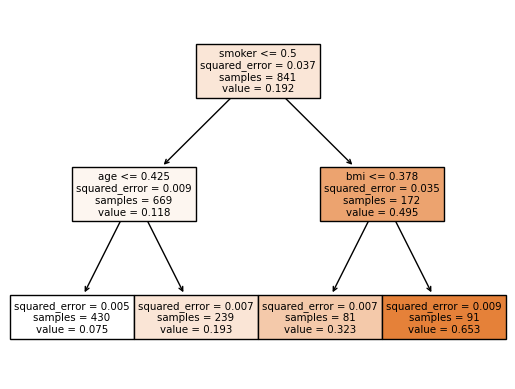

In [147]:
# Getting one of the trees in the forest
tree = rf_best.estimators_[5]

# Importing tree
from sklearn.tree import plot_tree

# Plotting the tree
plot_tree(rf_best.estimators_[5], feature_names = X.columns,filled=True);

### **4.2.3) Building model with best HyperParameter**

In [148]:
# Building model with best HyperParameter
model = RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_estimators=10,n_jobs=-1, random_state=42)

# Training the model
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_estimators=10,
                      n_jobs=-1, random_state=42)

# **Step 5 : Predicting Data using Model**

In [149]:
# Predicting data
y_pred = model.predict(X_test)

# Printing the result
y_pred

array([0.0702288 , 0.18522442, 0.0702288 , 0.18522442, 0.0702288 ,
       0.64911282, 0.0702288 , 0.64911282, 0.18522442, 0.0702288 ,
       0.0702288 , 0.18522442, 0.32433264, 0.18522442, 0.0702288 ,
       0.0702288 , 0.0702288 , 0.14895481, 0.64911282, 0.64911282,
       0.0702288 , 0.0702288 , 0.32433264, 0.18522442, 0.0702288 ,
       0.0702288 , 0.0702288 , 0.18522442, 0.0702288 , 0.32433264,
       0.0702288 , 0.0702288 , 0.0702288 ])

# **Step 6 : Model Evaluation**

In [150]:
# Accuracy Score

# Training Accuracy
acc_train = r2_score(y_train,m.predict(X_train))

# Testing Accuracy
acc_test = r2_score(y_test,y_pred)

# Mean Absolute Error
MAE =  mean_absolute_error(y_test,y_pred)

# Mean Square Error
MSE =  mean_squared_error(y_test,y_pred)

# Root Mean Square Error
rmse = np.sqrt(MSE)

print(f"Evaluation Parameter \nTraining Accuracy : {acc_train}\nTesting Accuracy : {acc_test}\nMAE : {MAE}\nMSE : {MSE}\nRMSE : {rmse}")

Evaluation Parameter 
Training Accuracy : 0.7581261675995381
Testing Accuracy : 0.9082866013033628
MAE : 0.046787911374868534
MSE : 0.003918944672139199
RMSE : 0.06260147499970907


# **Step 7 : Testing Model with New Data**

In [151]:
# Predicting Insurance Premium using New Data

sex = {'female':0, 'male':1}
classif = {'PREO':4, "OB1":1, "N":0, "OB2":2 , "OB3":3, "UW":5}
smoker = {"yes":1, "no":0}
region = {'southwest':3 , 'southeast':2 , 'northwest':1  ,'northeast':0 }

In [152]:
y_pred = model.predict([[25,sex['female'],23,classif['N'],1,smoker['yes'],region['southwest']]])
y_pred

array([0.64911282])

# **Methodology Used**

---



The following steps were taken to build the model:

1.  Data import and visualization: The historical dataset was imported and visualized to get insights into the data distribution and identify any potential outliers.


2.  Data preprocessing: The data was preprocessed to ensure that it was in a format suitable for modeling. This included label encoding categorical variables (I explored both methods of label encoding) , feature engineering, and feature scaling.


3.  Data splitting: The data was split into training and testing sets. The training set was used to train the model, and the testing set was used to evaluate the model's performance on unseen data. I explored different methods of Data Splitting.


4.  Model selection and training: Different regression models were trained on the training set. The model with the best performance on the training set was selected as the final model.


5.  Model prediction and evaluation: The final model was used to predict insurance premiums for the testing set. The model's performance was evaluated using metrics such as mean squared error and R-squared.


# **Notes & Findings**

---

1.  **Outlier Treatment**

    The target variable in this dataset contains a lot of outliers. I tried two different methods to treat the outliers:

    Removing outliers: I removed the outliers from the dataset and built a model. However, the highest model efficiency I achieved was 50%.

    Replacing outliers with mean and median: I replaced the outliers with the mean or median of the target variable. However, the highest model efficiency I achieved was 40%.

    Based on these results, I decided not to remove or replace the outliers.

2.  **Feature Scaling**

    I also tried two different methods for feature scaling:

    Scaling features only: I scaled the features in the dataset, but not the target variable.

    Scaling features and target: I scaled both the features and the target variable in the dataset.
     
    I found that scaling both the features and the target variable had no significant impact on model efficiency. Therefore, I decided to scale both the features and the target variable.
  
3. **Feature Selection**

    From Pearson Correlation Coefficient, I found that the classif and region features have very low correlations with the target variable. However, I am not removing these features because we have a limited number of features in the dataset.

    It is important to note that the Pearson correlation coefficient only measures linear relationships. It is possible that the classif and region features have non-linear relationships with the target variable that are not captured by the Pearson correlation coefficient.

    Overall, I decided to keep the classif and region features in the dataset, even though they have low correlations with the target variable. This is because we have a limited number of features and it is possible that these features may be useful for prediction, even if they are not strongly correlated with the target variable.


4.  **Data Scaling**

    In this project, I observed that the target variable has a very large range of values and is skewed. It is seen that the majority of the values are clustered towards one end of the range, and there are outlier values at the other end of the range.

    To address this, I scaled both the features and the target variable using a MinMax scaler.

    It will improve the numerical stability of the training process.
    

4.  **Data Visualization : Relationship between Features and Target Variable**

    Customer Age: Insurance charges increase with customer age, neglecting extreme data points. This is because older people are more likely to have health problems, which can lead to higher medical costs.

    Gender: The average insurance amount for male and female is the same. This suggests that gender is not a significant factor in determining insurance charges.

    BMI: There is no linear relationship between BMI and insurance charges.

    Health Classification Group: The average insurance charges are higher for the OB2 health classification group. This is because people in this group are at higher risk of developing health problems.

    Number of Children: The mean insurance charges for customers having four children are higher than others. This is likely because families with more children have higher medical costs.

    Region: The average insurance charges are nearly the same for all regions. This suggests that region is not a significant factor in determining insurance charges.











# **Results**

---



The best regression model for predicting insurance premiums was found to be a random forest regressor. The model achieved a mean squared error of 0.004 and an R-squared of 0.90 on the testing set.

# **Discussion**

---

The random forest regressor model performed well on the testing set, indicating that it can be used to accurately predict insurance premiums for new input data. However, it is important to note that the model is only as good as the data it is trained on. If the training data is not representative of the real-world data, the model may not perform well in practice.

# **Conclusion**



---



The random forest regressor model developed in this project can be used to predict insurance premiums for new input data. The model is accurate and robust to outliers. However, it is important to note that the model is only as good as the data it is trained on.